In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt


In [2]:
df= pd.read_csv('scada.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50530 entries, 0 to 50529
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date/Time                      50530 non-null  object 
 1   LV ActivePower (kW)            50530 non-null  float64
 2   Wind Speed (m/s)               50530 non-null  float64
 3   Theoretical_Power_Curve (KWh)  50530 non-null  float64
 4   Wind Direction (°)             50530 non-null  float64
dtypes: float64(4), object(1)
memory usage: 1.9+ MB


In [3]:
df['Date/Time'] = pd.to_datetime(df['Date/Time'], format='%d %m %Y %H:%M')

In [4]:
df = df.dropna()

In [5]:
X = df[['Theoretical_Power_Curve (KWh)', 'Wind Speed (m/s)','Wind Direction (°)']]
y = df['LV ActivePower (kW)']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
model = LinearRegression()

In [15]:
model.fit(X_train, y_train)

LinearRegression()

In [17]:
y_pred = model.predict(X_test)

In [19]:
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error
r2 = r2_score(y_test, y_pred)  # R^2 Score

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R^2 Score: {r2}")


Mean Squared Error (MSE): 169505.14196548556
Mean Absolute Error (MAE): 188.75221227147185
R^2 Score: 0.900659924538588


In [21]:
print(f'Mean Squared Error (MSE): {mse}')
print(f'R^2 Score: {r2}')
print(f'Mean Absol Error (MSE): {mse}')

Mean Squared Error (MSE): 169505.14196548556
R^2 Score: 0.900659924538588
Mean Absol Error (MSE): 169505.14196548556


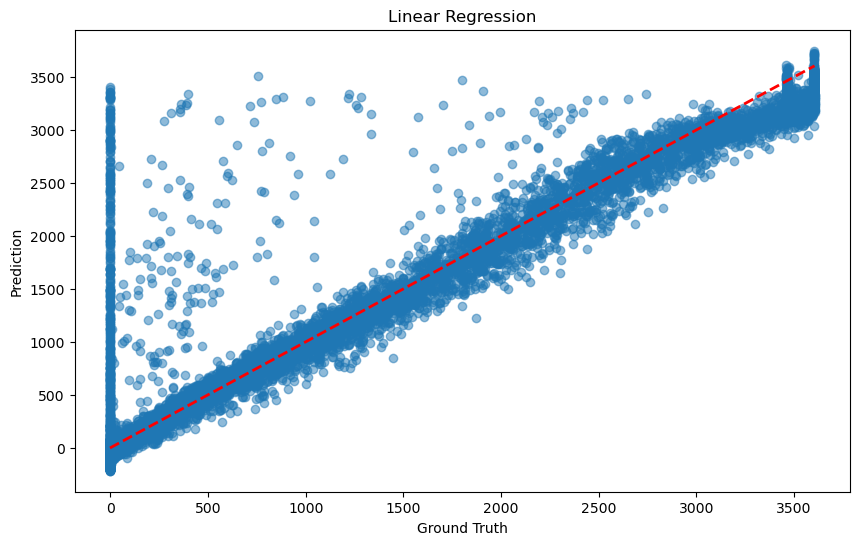

In [24]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Ground Truth')
plt.ylabel('Prediction')
plt.title('Linear Regression')
plt.show()

In [26]:
resultados = pd.DataFrame({
    'Real': y_test,
    'Predicted': y_pred
})

In [28]:
resultados.head()

,Real,Predicted
8057,3348.910889,3055.744304
8059,2647.506104,2635.420713
50250,0.000000,659.770976
14774,1334.573975,1303.790727
49374,533.002808,594.095196


In [30]:
from IPython.display import display
display(resultados)

,Real,Predicted
8057,3348.910889,3055.744304
8059,2647.506104,2635.420713
50250,0.000000,659.770976
14774,1334.573975,1303.790727
49374,533.002808,594.095196
...,...,...
20904,1241.927002,1233.750657
17208,0.000000,44.479815
43820,0.000000,-27.818227
43653,961.278687,931.942864


In [32]:
correlation_matrix = df.corr()

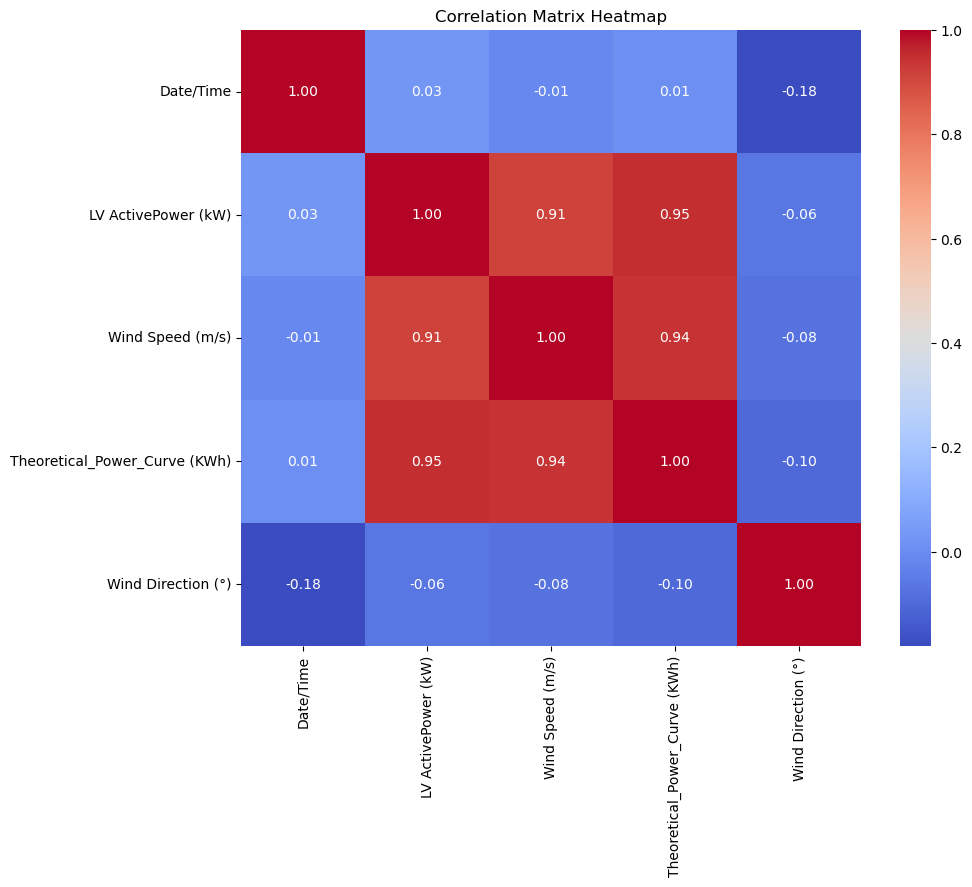

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación
correlation_matrix = df.corr()

# Crear el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

# Agregar título
plt.title("Correlation Matrix Heatmap")
plt.show()

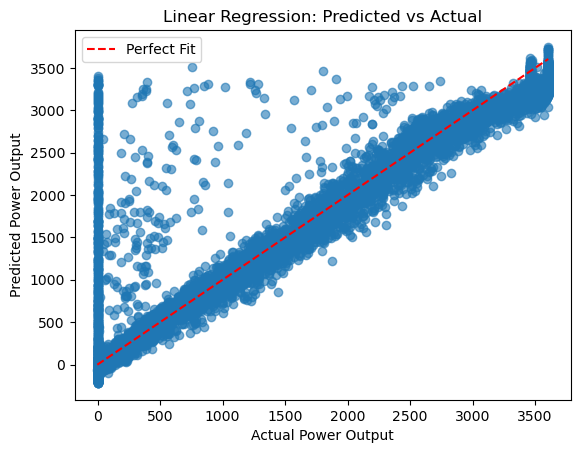

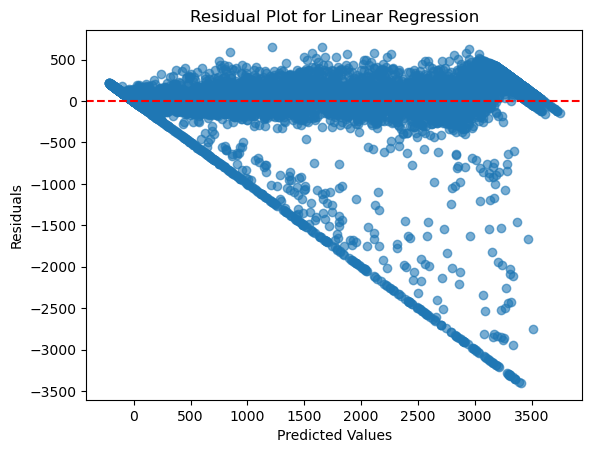

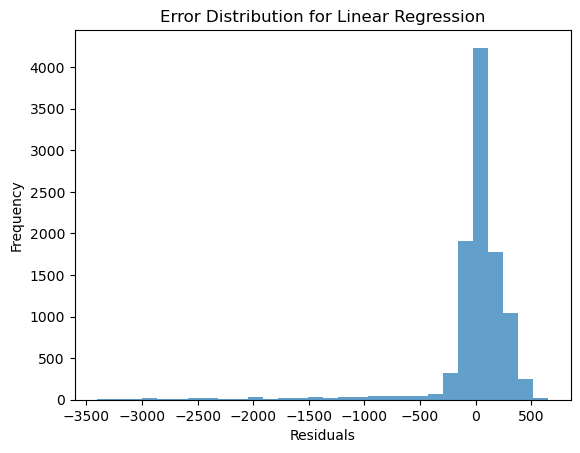

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# Scatter Plot: Predicted vs. Actual
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label="Perfect Fit")
plt.title("Linear Regression: Predicted vs Actual")
plt.xlabel("Actual Power Output")
plt.ylabel("Predicted Power Output")
plt.legend()
plt.show()

# Residual Plot
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residual Plot for Linear Regression")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

# Error Distribution Histogram
plt.hist(residuals, bins=30, alpha=0.7)
plt.title("Error Distribution for Linear Regression")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()